In [1]:
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('shot_logs.csv')


In [3]:
new_pd = data[['GAME_ID','LOCATION','SHOT_RESULT','PTS', 'player_name', 'player_id']]

In [4]:
new_pd.head()

,GAME_ID,LOCATION,SHOT_RESULT,PTS,player_name,player_id
0,21400899,A,made,2,brian roberts,203148
1,21400899,A,missed,0,brian roberts,203148
2,21400899,A,missed,0,brian roberts,203148
3,21400899,A,missed,0,brian roberts,203148
4,21400899,A,missed,0,brian roberts,203148


In [5]:
away_made_data = new_pd.loc[(new_pd['LOCATION'] == 'A') & (new_pd['SHOT_RESULT'] == 'made')]
home_made_data = new_pd.loc[(new_pd['LOCATION'] == 'H') & (new_pd['SHOT_RESULT'] == 'made')]
away_miss_data = new_pd.loc[(new_pd['LOCATION'] == 'A') & (new_pd['SHOT_RESULT'] == 'missed')]
home_miss_data = new_pd.loc[(new_pd['LOCATION'] == 'H') & (new_pd['SHOT_RESULT'] == 'missed')]

In [6]:
made_shots_away = away_made_data.groupby('player_name')['SHOT_RESULT'].count()
made_shots_home = home_made_data.groupby('player_name')['SHOT_RESULT'].count()
missed_shots_away = away_miss_data.groupby('player_name')['SHOT_RESULT'].count()
missed_shots_home = home_miss_data.groupby('player_name')['SHOT_RESULT'].count()

In [7]:
player_df = pd.DataFrame({'Away Makes':made_shots_away, 'Away Misses':missed_shots_away, 'Home Makes':made_shots_home,'Home Misses':missed_shots_home})

In [32]:
player_df['Away Total'] = (player_df['Away Makes'] + player_df['Away Misses'])
player_df['Home Total'] = (player_df['Home Makes'] + player_df['Home Misses'])
player_df['Away Percentage'] = (player_df['Away Makes'] / player_df['Away Total'])
player_df['Home Percentage'] = (player_df['Home Makes'] / player_df['Home Total'])
player_df['Difference'] = (player_df['Away Percentage'] - player_df['Home Percentage'])
best_home = player_df.Difference
best_away = player_df.Difference
best_home = best_home.sort_values(ascending = True)
best_away = best_away.sort_values(ascending = False)
best_home = best_home.head(10)
best_away = best_away.head(10)
player_df

,Away Makes,Away Misses,Home Makes,Home Misses,Away Total,Home Total,Away Percentage,Home Percentage,Difference
player_name,,,,,,,,,
aaron brooks,108,145,125,183,253,308,0.426877,0.405844,0.021033
aaron gordon,25,23,30,26,48,56,0.520833,0.535714,-0.014881
al farouq aminu,52,79,59,68,131,127,0.396947,0.464567,-0.067620
al horford,179,150,208,178,329,386,0.544073,0.538860,0.005213
al jefferson,182,203,200,215,385,415,0.472727,0.481928,-0.009200
alan anderson,89,104,57,87,193,144,0.461140,0.395833,0.065307
alan crabbe,19,24,21,30,43,51,0.441860,0.411765,0.030096
alex len,91,74,67,67,165,134,0.551515,0.500000,0.051515
alexis ajinca,62,33,64,52,95,116,0.652632,0.551724,0.100907


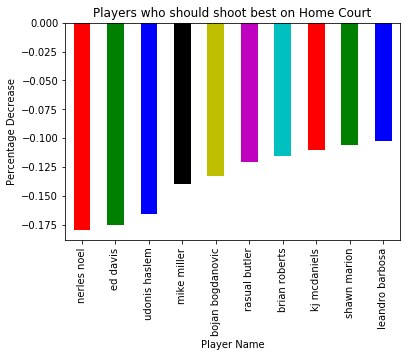

In [37]:

my_colors = 'rgbkymc'
best_home.plot.bar(x="player_name", y="Difference", color= my_colors)
plt.title('Players who should shoot best on Home Court')
plt.xlabel("Player Name")
plt.ylabel("Percentage Decrease")
plt.show()

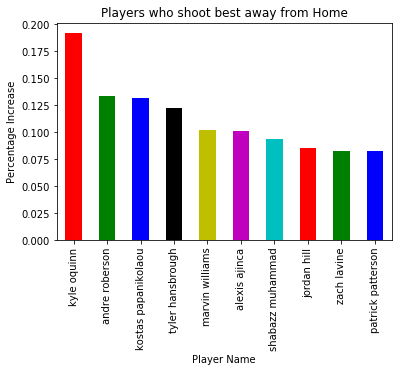

In [38]:

my_colors = 'rgbkymc'
best_away.plot.bar(x="player_name", y="Difference", color= my_colors)
plt.title("Players who shoot best away from Home")
plt.xlabel("Player Name")
plt.ylabel("Percentage Increase")
plt.show()